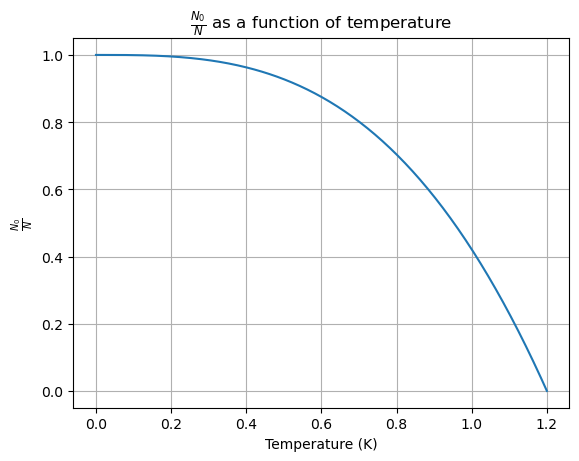

In [6]:
import numpy as np
from scipy.special import zeta

import matplotlib.pyplot as plt

# Constants
T_c = 1.2  # Critical temperature of the superconductor (K)

# Temperature range
T = np.linspace(0, 1.2, 300)
  # Temperature from 1K to 300K

# Number of particles
N = 1e23  # Total number of particles (you can adjust this value)

# Calculate the fraction N_0/N
N_0_over_N = 1 - (T/T_c)**3

# Plot the graph
plt.plot(T, N_0_over_N)
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\frac{N_0}{N}$')
plt.title(r'$\frac{N_0}{N}$ as a function of temperature')
plt.grid(True)
plt.show()

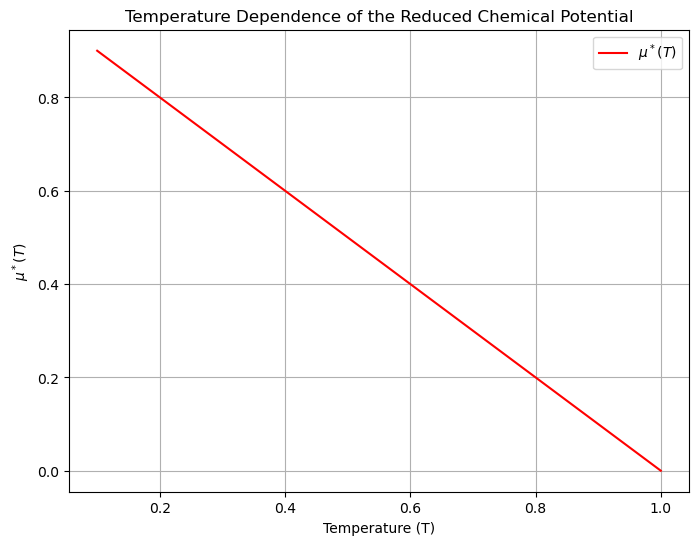

In [7]:
def mu_star_T(T, A, T_c):
    """A simple linear temperature dependence of the reduced chemical potential."""
    return A * (T_c - T)

# Constants for temperature dependence
A = 1.0  # Adjustable constant
T_c = 1.0  # Critical temperature, for example
T_vals = np.linspace(0.1, T_c, 100)

# Calculate mu_star for different temperatures
mu_star_vals = [mu_star_T(T, A, T_c) for T in T_vals]

# Plot mu_star vs T
plt.figure(figsize=(8, 6))
plt.plot(T_vals, mu_star_vals, label=r"$\mu^*(T)$", color="red")
plt.title("Temperature Dependence of the Reduced Chemical Potential")
plt.xlabel("Temperature (T)")
plt.ylabel(r"$\mu^*(T)$")
plt.legend()
plt.grid()
plt.show()


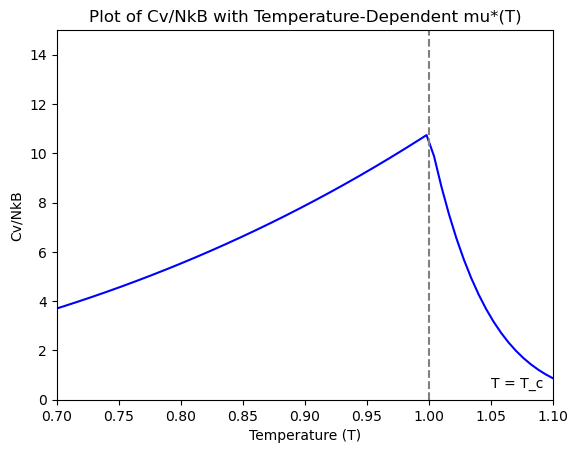

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
zeta4 = np.pi**4 / 90  # Approximation of Zeta[4]
zeta3 = 1.20206  # Approximation of Zeta[3]
C1 = 12 * zeta4 / zeta3

# Define mu*(T)
def mu_star(T, A, Tc):
    return A * (Tc - T)

# Define Cv/NkB function
def cv_over_nkb(T, A, Tc):
    if T <= Tc:
        return C1 * (T / Tc)**3
    else:
        mu_star_val = mu_star(T, A, Tc)
        return (3 * zeta4 / zeta3) * (4 * T**3 + mu_star_val * T**2) * np.exp(mu_star_val * T)

# Parameters
A = 20
Tc = 1.0

# Temperature range
T = np.linspace(0, 3, 500)
Cv_NkB = [cv_over_nkb(t, A, Tc) for t in T]

# Plot
fig, ax = plt.subplots()

# Main plot
ax.plot(T, Cv_NkB, color="blue")
ax.axvline(Tc, color="gray", linestyle="--")
ax.text(Tc + 0.05, 0.5, "T = T_c", color="black")
ax.set_xlim(0.7, 1.1)
ax.set_ylim(0, 15)
ax.set_xlabel("Temperature (T)")
ax.set_ylabel("Cv/NkB")
ax.set_title("Plot of Cv/NkB with Temperature-Dependent mu*(T)")

plt.show()
